In [1]:
import os
os.chdir('../../..')

In [2]:
import convokit
from convokit import TextParser, TensorDecomposer, Corpus, download

In [3]:
corpus = Corpus(filename='convokit/tensors/longreddit_construction/long-reddit-corpus-focused-first60')

In [4]:
corpus.print_summary_stats()

Number of Speakers: 74931
Number of Utterances: 337112
Number of Conversations: 25508


In [5]:
cats = ['adverb', 'article', 'auxverb', 'conj', 'ipron', 'i', 'we', 'you', 'shehe', 'they', 'prep', 'negate', 
        'interrog', 'quant']

In [6]:
for convo in corpus.iter_conversations():
    for idx, utt in enumerate(convo.get_chronological_utterance_list()):
        convo.meta['liwc-{}'.format(idx+1)] = {k: utt.meta[k] for k in cats}

In [7]:
convo_df = corpus.get_conversations_dataframe()

In [8]:
from collections import Counter

ctr = Counter(convo_df['meta.subreddit'])

In [9]:
{k: v for k, v in sorted(list(ctr.items()), key=lambda x: x[1])}

{'AskWomen': 98,
 'MakeupAddiction': 106,
 'antiMLM': 109,
 'singapore': 114,
 'aww': 115,
 'Fitness': 116,
 'askscience': 127,
 'The_Donald': 128,
 'SquaredCircle': 132,
 'CFB': 134,
 'Frugal': 135,
 'hockey': 136,
 'baseball': 147,
 'books': 149,
 'anime': 150,
 'ShingekiNoKyojin': 151,
 'photography': 154,
 'TheRedPill': 154,
 'magicTCG': 155,
 'WTF': 156,
 'Marvel': 159,
 'DotA2': 159,
 'relationships': 159,
 'MMA': 166,
 'movies': 166,
 'Music': 168,
 'Diablo': 174,
 'pokemon': 176,
 'videos': 179,
 'explainlikeimfive': 181,
 'Games': 182,
 'MGTOW': 184,
 'nfl': 186,
 'science': 188,
 'cringepics': 190,
 'funny': 191,
 'wow': 194,
 'AskMen': 202,
 'toronto': 203,
 'gifs': 204,
 'tifu': 204,
 'lotr': 205,
 'apple': 207,
 'soccer': 207,
 'Python': 207,
 'nba': 208,
 'Guildwars2': 212,
 'Android': 212,
 'business': 223,
 'leagueoflegends': 225,
 'guns': 227,
 'starcraft': 231,
 'Conservative': 233,
 'skyrim': 233,
 'raisedbynarcissists': 236,
 'MaliciousCompliance': 239,
 'australia'

### LIWC-based TCA

In [7]:
td = TensorDecomposer(feature_set=['liwc-{}'.format(idx) for idx in range(1, 10+1)], 
                      obj_type="conversation", tensor_func='tensortools-ncp-bcd', rank=9)

In [8]:
td.fit(corpus)

Constructing tensor...Done.
Decomposing tensor...NCP_BCD: iteration 1, objective 0.7111533626085276, improvement inf.
NCP_BCD: iteration 2, objective 0.7008461967265832, improvement 0.010307165881944358.
NCP_BCD: iteration 3, objective 0.6955929259516624, improvement 0.005253270774920771.
NCP_BCD: iteration 4, objective 0.6914281856890407, improvement 0.004164740262621702.
NCP_BCD: iteration 5, objective 0.6879426367478865, improvement 0.0034855489411542706.
NCP_BCD: iteration 6, objective 0.6848628001996956, improvement 0.003079836548190884.
NCP_BCD: iteration 7, objective 0.6820261816259303, improvement 0.0028366185737652705.
NCP_BCD: iteration 8, objective 0.6794373047019848, improvement 0.0025888769239454934.
NCP_BCD: iteration 9, objective 0.6770677581980041, improvement 0.0023695465039806907.
NCP_BCD: iteration 10, objective 0.674978665417985, improvement 0.0020890927800191195.
NCP_BCD: iteration 11, objective 0.6732472800026824, improvement 0.0017313854153025998.
NCP_BCD: iterat

NCP_BCD: iteration 95, objective 0.6491453256310703, improvement 1.535294398780085e-05.
NCP_BCD: iteration 96, objective 0.6491316774019684, improvement 1.3648229101881348e-05.
NCP_BCD: iteration 97, objective 0.6491191886119722, improvement 1.248878999626779e-05.
NCP_BCD: iteration 98, objective 0.6491078255946922, improvement 1.1363017279997223e-05.
NCP_BCD: iteration 99, objective 0.6490977061889566, improvement 1.0119405735586895e-05.
NCP_BCD: iteration 100, objective 0.6490887276384161, improvement 8.9785505404949e-06.
Converged after 100 iterations, 7.323589392999992 seconds. Objective: 0.6490887276384161.
Done.


Report generated at convokit/tensor_decomposer/reports/liwc-focused-first60-TCA/report.html


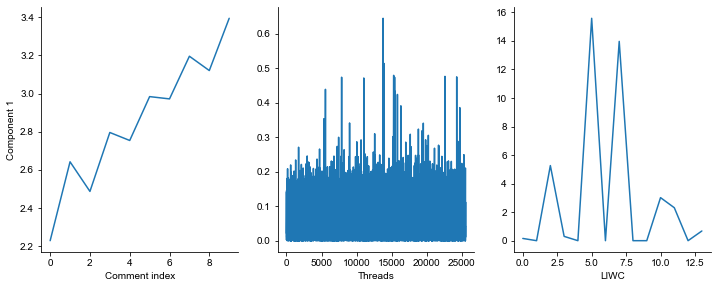

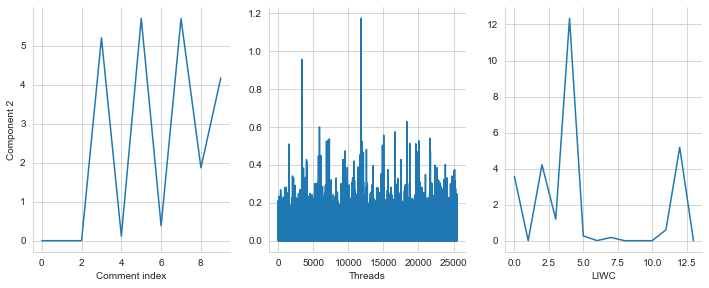

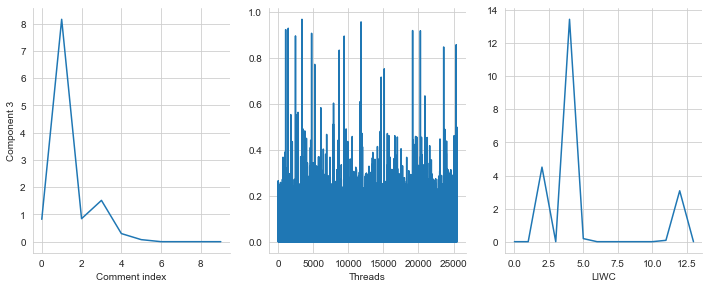

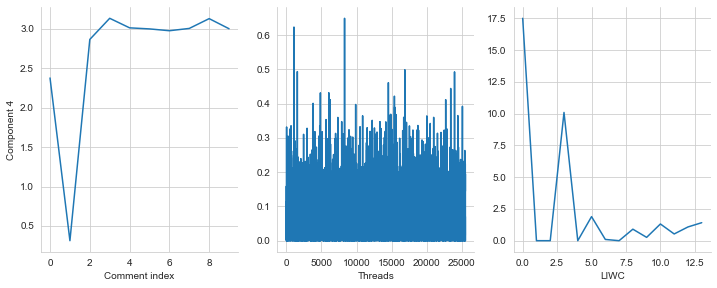

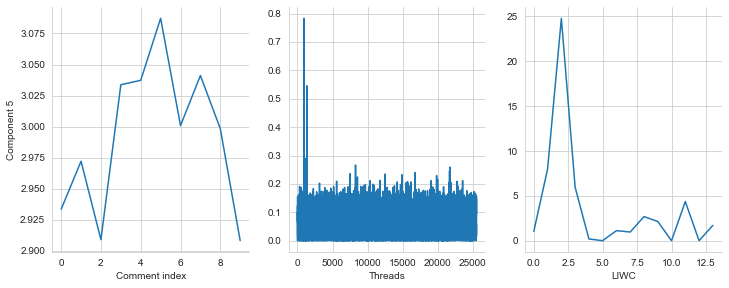

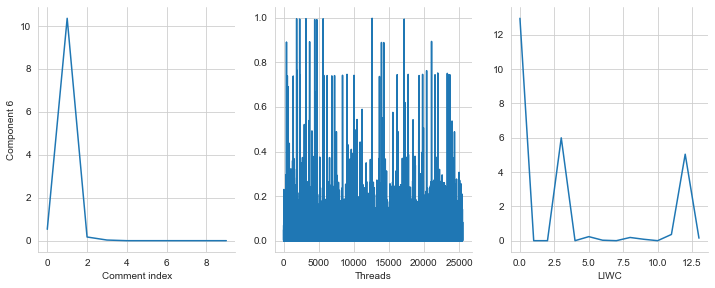

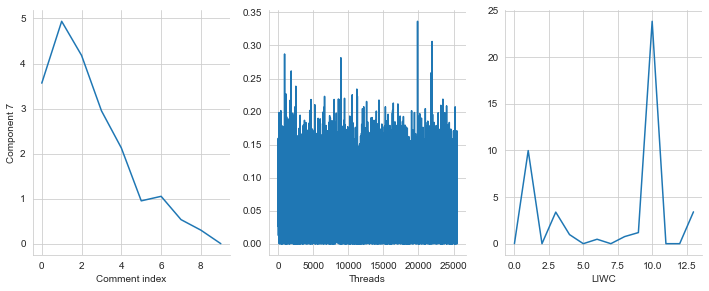

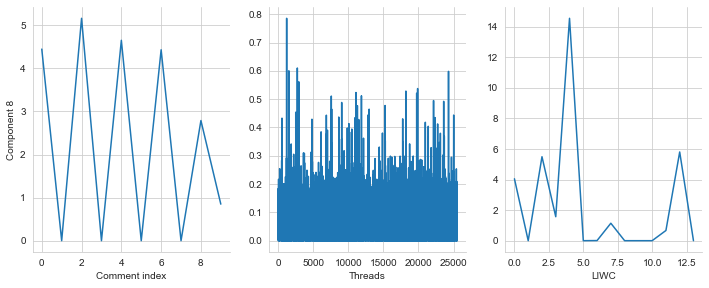

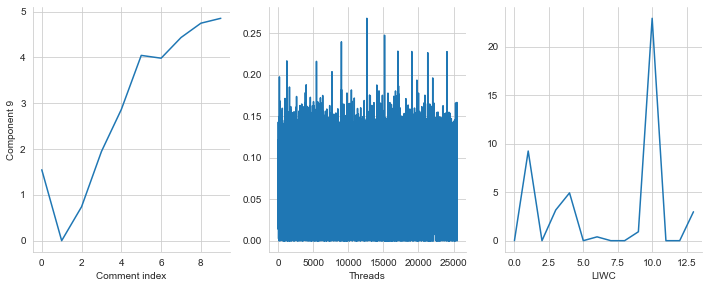

In [9]:
td.summarize(corpus, axis_names=['Comment index', 'Threads', 'LIWC'], 
             output_dir='convokit/tensor_decomposer/reports/liwc-focused-first60-TCA', 
             report_title='LIWC-focused-first60-nonnegative', 
             liwc=True)

### First 60 tokens -- Binarized features

In [10]:
for convo in corpus.iter_conversations():
    for idx, utt in enumerate(convo.get_chronological_utterance_list()):
        convo.meta['liwc-present-{}'.format(idx+1)] = {k: int(utt.meta[k] > 0) for k in cats}

In [11]:
td_present = TensorDecomposer(feature_set=['liwc-present-{}'.format(idx) for idx in range(1, 10+1)], 
                              obj_type="conversation", tensor_func='tensortools-ncp-bcd', rank=9)

In [12]:
td_present.fit(corpus)

Constructing tensor...Done.
Decomposing tensor...NCP_BCD: iteration 1, objective 0.5899165244423116, improvement inf.
NCP_BCD: iteration 2, objective 0.5790939634134153, improvement 0.010822561028896227.
NCP_BCD: iteration 3, objective 0.5721371869898112, improvement 0.00695677642360415.
NCP_BCD: iteration 4, objective 0.5664624464322678, improvement 0.005674740557543356.
NCP_BCD: iteration 5, objective 0.5616612539380683, improvement 0.004801192494199524.
NCP_BCD: iteration 6, objective 0.5575412161061291, improvement 0.0041200378319392605.
NCP_BCD: iteration 7, objective 0.5539728512711396, improvement 0.003568364834989457.
NCP_BCD: iteration 8, objective 0.5509217108813823, improvement 0.0030511403897572897.
NCP_BCD: iteration 9, objective 0.5483882040564856, improvement 0.002533506824896725.
NCP_BCD: iteration 10, objective 0.5463441778373653, improvement 0.002044026219120254.
NCP_BCD: iteration 11, objective 0.5447349093349062, improvement 0.001609268502459127.
NCP_BCD: iteration 

NCP_BCD: iteration 96, objective 0.530266423438216, improvement 2.6871942460648945e-05.
NCP_BCD: iteration 97, objective 0.530240703022766, improvement 2.5720415449903555e-05.
NCP_BCD: iteration 98, objective 0.5302149799676036, improvement 2.5723055162463204e-05.
NCP_BCD: iteration 99, objective 0.53018954332663, improvement 2.5436640973541813e-05.
NCP_BCD: iteration 100, objective 0.5301654982163495, improvement 2.404511028053502e-05.
NCP_BCD: iteration 101, objective 0.5301420864991188, improvement 2.3411717230747975e-05.
NCP_BCD: iteration 102, objective 0.5301201468338705, improvement 2.1939665248216222e-05.
NCP_BCD: iteration 103, objective 0.5300977420868744, improvement 2.2404746996107505e-05.
NCP_BCD: iteration 104, objective 0.5300751907332095, improvement 2.2551353664912455e-05.
NCP_BCD: iteration 105, objective 0.5300541289727269, improvement 2.1061760482665726e-05.
NCP_BCD: iteration 106, objective 0.5300343110170173, improvement 1.98179557096001e-05.
NCP_BCD: iteration 10

Report generated at convokit/tensor_decomposer/reports/liwc-present-focused-first60-TCA/report.html


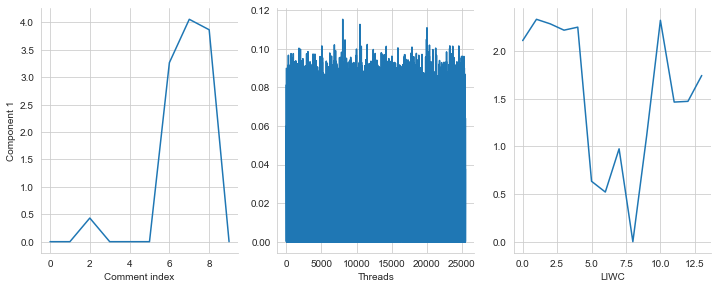

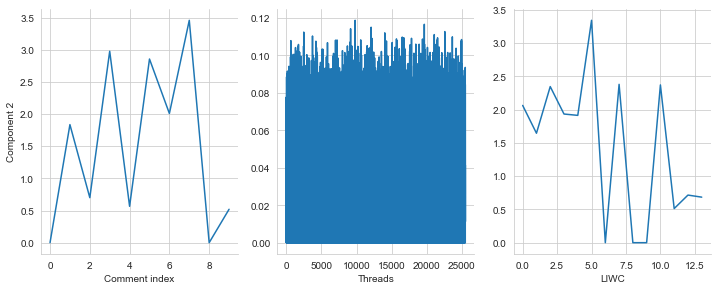

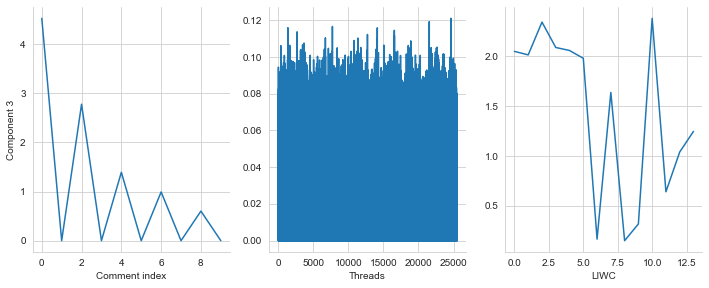

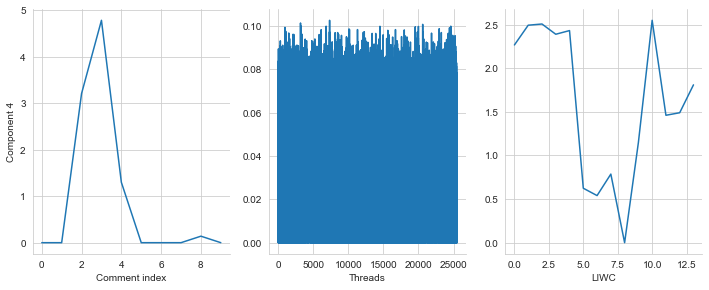

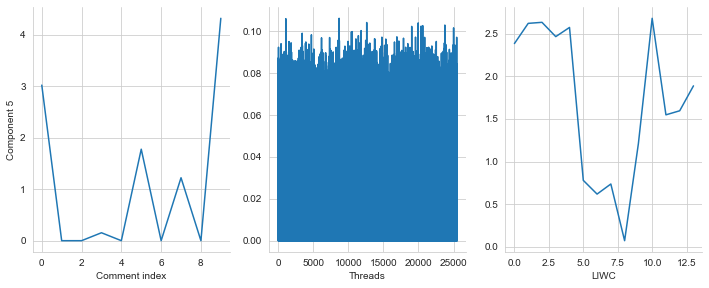

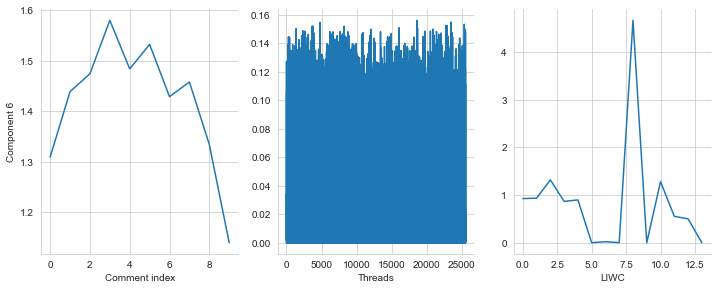

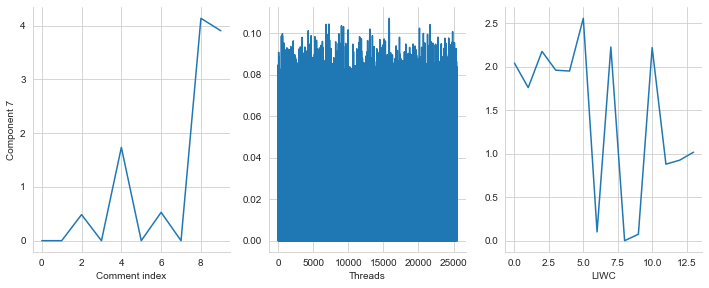

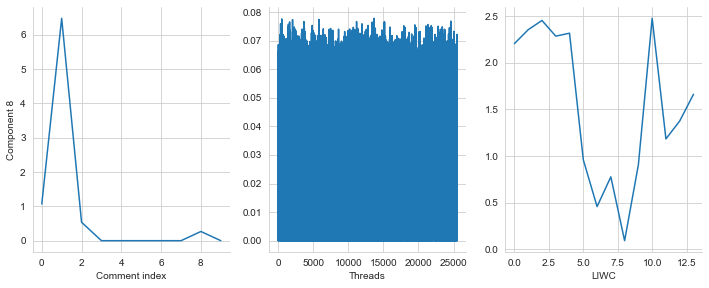

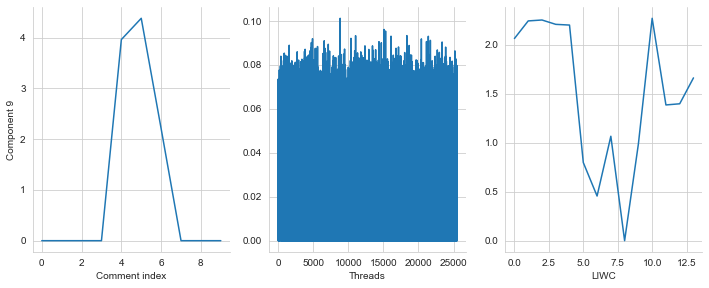

In [13]:
td_present.summarize(corpus, axis_names=['Comment index', 'Threads', 'LIWC'], 
             output_dir='convokit/tensor_decomposer/reports/liwc-present-focused-first60-TCA', 
             report_title='LIWC-present-focused-first60-nonnegative', 
             liwc=True)

In [14]:
component_idx_to_distinctive = td_present.get_components(corpus)

### Component 1

In [18]:
import pandas as pd

In [19]:
pd.set_option('display.max_colwidth', -1)

In [22]:
td_present.get_component_example(component_idx_to_distinctive, 3)

,text,speaker
id,,
e53wbkv,i am willing to tentatively reserve one with you. i would like a timid one. nobody really knows how best buy will distribute codes but i have two of them nearby and a third that i pass on the way to work. i am hopeful they have the careless attitude that all the targets in the area have. (still have a ton of t/t codes that nobody wants and could go get more but no reason to do so. they were still out on the counters a few days ago),RainofAsh
e53x3ax,noted. thanks.,UltraTrainerAi
e5cte7o,i have not gotten quite enough today. one of them ran out and the other has them on complete lockdown like the gamestops around here do. i am still hoping another run tomorrow will get me up to 20. just wanted you to have an update.,RainofAsh
e5ctxjk,alright. thank you for the update.,UltraTrainerAi
e5f6vio,i did manage to just barely get 20. will that still be ok? they were even more stingy than gamestop at all but one of the local best buys.,RainofAsh
e5f7jwm,yeah. that's fine. are you available to make this trade?,UltraTrainerAi
e5f7u44,i am now. i just need to scratch the codes and take a pic.,RainofAsh
e5f7wgo,"okay. can you include both our usernames and the current date on a piece of paper in the picture as well, please?",UltraTrainerAi
e5f8kwa,i sent the image. let me know if it has everything you need.,RainofAsh


In [14]:
import pandas as pd

In [15]:
component_idx_to_distinctive[4]['pos_feats']

['adverb']

In [16]:
corpus.random_utterance().meta

{'score': 76,
 'top_level_comment': 'ds864n8',
 'retrieved_on': 1517589171,
 'gilded': 0,
 'gildings': None,
 'subreddit': 'anime',
 'stickied': False,
 'permalink': '/r/anime/comments/7ob76a/amazon_has_just_killed_off_anime_strike_in_the_us/ds88d3r/',
 'author_flair_text': 'https://myanimelist.net/profile/LegitPancake',
 'liwc': {'WC': 10.0,
  'Analytic': 25.89,
  'Clout': 15.86,
  'Authentic': 3.37,
  'Tone': 99.0,
  'WPS': 10.0,
  'Sixltr': 20.0,
  'Dic': 90.0,
  'function': 70.0,
  'pronoun': 20.0,
  'ppron': 10.0,
  'i': 10.0,
  'we': 0.0,
  'you': 0.0,
  'shehe': 0.0,
  'they': 0.0,
  'ipron': 10.0,
  'article': 0.0,
  'prep': 30.0,
  'auxverb': 0.0,
  'adverb': 20.0,
  'conj': 20.0,
  'negate': 0.0,
  'verb': 0.0,
  'adj': 20.0,
  'compare': 20.0,
  'interrog': 0.0,
  'number': 0.0,
  'quant': 10.0,
  'affect': 10.0,
  'posemo': 10.0,
  'negemo': 0.0,
  'anx': 0.0,
  'anger': 0.0,
  'sad': 0.0,
  'social': 0.0,
  'family': 0.0,
  'friend': 0.0,
  'female': 0.0,
  'male': 0.0,
  

In [17]:
td.features

['adverb',
 'article',
 'auxverb',
 'conj',
 'ipron',
 'i',
 'we',
 'you',
 'shehe',
 'they',
 'prep',
 'negate',
 'interrog',
 'quant']

In [18]:
pd.set_option('display.max_colwidth', -1)

In [81]:
td.get_component_example(component_idx_to_distinctive, 9)

,text,speaker,meta.prep
id,,,
dqoqd6a,Torress is obviously clean. NO PEDS,puckingleafs,0
dqoqfmi,One of the most tested athletes in the UFC,ratazengo,22.22
dqoqg4p,For a reason,AttackHelicopter97,33.33
dqoqpzb,Barnett has the most failed drug tests in North American MMA history. The eye test is not really a good indicator whether somebody's on the juice or not,ratazengo,7.14
dqoqzx9,Comparing false negatives with potentially false positives is intellectually lazy.,TriplePlusBad,10
dqorkth,All I'm saying is there is no scientific or statistical evidence that athletes with more defined muscles are more likely to juice than athletes with less defined muscles,ratazengo,14.29
dqoxrh0,That's not the point. You're saying that we don't have any reason to believe that Torres is juicing because fat people juice too.\n\nWhich is nonsense. Natty women do not look like Tecia Torres unless they have hidden testicles.,TriplePlusBad,7.69
dqpaijb,All right. I knew I was wasting my time replying to you. Thanks for confirming it,ratazengo,12.5
dqq37m9,Don't get mad at me because your logic is misfiring.,TriplePlusBad,10


In [20]:
td.get_component_example(component_idx_to_distinctive, 5)

,text,speaker,meta.adverb
id,,,
drb9ytr,"It's super strange. I have a 90% wr ZvZ, 50% ZvT and 40% ZvP . I think one of the huge things to underline is to learn the main build orders in your matchup to learn what to expect. I'm diamond 3, and cheese is easily killable at my MMR. Learn the way your opponents race tends to play and work to counter it.\n\nStarcraft is a game of limited information.\n\nEdit* - Since people don't believe me about my winrates, here is a screenshot.\nZ- 10g, 9-1.\nP- 9g, 4-5.\nT- 10g, 5-5.\nhttps://imgur.com/a/DRDqi",IamCannafruit,2.08
drbfisf,those numbers don't seem to add up.,Ketroc21,0
drbtjjq,How so?,Mycroft331,100
drbuhtr,He'd have to play ~4 ZvPs for every ZvZ to have those %s make sense.,Ketroc21,0
drc9yar,Why? He could be 9-1;5-5; 4-6 without problems?,CrazyJack2991,8.33
drcb654,"He was using percentages and using his win rate as evidence, so I incorrectly assumed he hadn't played so few games. With a higher sample size of games, his overall win rate must be close to 50% because of the way match-making works (unless he's top GM or bottom bronze)",Ketroc21,3.92
drcch1k,you're assuming that he encounters opponents of each race with equal frequency,nemofourteen,0
drcdhj8,&gt; He'd have to play ~4 ZvPs for every ZvZ to have those %s make sense.\n\n,Ketroc21,0
drcee8t,Man you're pretty dense. To be sure once I'm inside from this smoke I'll link you a screenshot of my race breakdown.,IamCannafruit,0


In [21]:
td.get_component_example(component_idx_to_distinctive, 5)

,text,speaker,meta.adverb
id,,,
dr04ihn,I wish it snowed here in Australia.,Universal-Cereal-Bus,14.29
dr04mq0,I wish it snowed here in Los Angeles.,Hi__135,12.5
dr0ib0v,I wish it snowed here in Sweden... Like it's fucking supposed to.,Carlen67,8.33
dr0ixpc,"I wish it snowed in England... but no, we just get freezing rain.",TavaJava,7.69
dr15fu7,It *is* snowing here! well where I am anyway,steerpike88,44.44
dr18gzq,Where night you be?,TavaJava,25
dr19lx9,london,steerpike88,0
dr1c779,"Ah, im In Surrey.",TavaJava,0
dr1ckee,"[Looks good, actually slush](http://imgur.com/lJxRj9w.jpg)",steerpike88,20


In [22]:
pos_threads_9 = component_idx_to_distinctive[8]['pos_threads']

In [23]:
from collections import defaultdict
num_users_in_convo = defaultdict(int)
for convo in pos_threads_9:
    num_users_in_convo[len(list(convo.iter_speakers()))] += 1
    

In [24]:
num_users_in_convo

defaultdict(int,
            {5: 9,
             2: 184,
             3: 28,
             19: 1,
             6: 7,
             7: 7,
             9: 2,
             10: 10,
             8: 5,
             1: 7,
             4: 9,
             13: 2,
             22: 1,
             15: 1,
             16: 1,
             11: 4,
             12: 1})

In [25]:
td.get_component_example(component_idx_to_distinctive, 7)

,text,speaker,meta.prep
id,,,
e504508,Feels good to be Jewish.,DaddyNewYork,20
e5174g3,why?,TheShapeOfColor,0
e517u3g,We don't believe in a permanent hell. We don't believe someone has to die to save us from sin,DaddyNewYork,21.05
e51898j,what do you believe about the after life?,TheShapeOfColor,25
e51acr5,"Everyone meets G-d, only the righteous Gentiles and the Jews have a place in the world to come though.\n\nGehinnom is temporary and not a place of suffering but purification\n\nSome Sages think the truly wicked stay there, so think of Hitler and Stalin. Others think their souls are destroyed.\n\nThis ^ is the exception more the rule. Not sure what to think of this.",DaddyNewYork,9.23
e51aw6a,what defines righteousness then? sorry im pretty unknowing on jewish beliefs,TheShapeOfColor,9.09
e51bpw0,Following the Seven Laws of Noah\nhttps://www.chabad.org/library/article_cdo/aid/62221/jewish/The-7-Noahide-Laws-Universal-Morality.htm,DaddyNewYork,14.29
e51md2g,what do you think of Jesus?,TheShapeOfColor,16.67
e51mjwf,"Not sure, assuming he existed he was a heretic that said some nice things and some pretty heretical stuff .",DaddyNewYork,0


In [26]:
pos_threads = component_idx_to_distinctive[4]['pos_threads']
num_users_in_convo = defaultdict(int)
for convo in pos_threads:
    speakers = set([utt.speaker.id for utt in convo.get_chronological_utterance_list()[:10]])
    num_users_in_convo[len(speakers)] += 1

spkrs = 0
for k, v in num_users_in_convo.items():
    spkrs += k*v

convos = sum(list(num_users_in_convo.values()))
print(spkrs/convos)

4.028846153846154


In [27]:
spkrs/convos

4.028846153846154

In [28]:
num_users_in_convo

defaultdict(int,
            {5: 30,
             8: 17,
             4: 56,
             2: 95,
             3: 66,
             10: 8,
             6: 19,
             9: 12,
             7: 8,
             1: 1})

### Using length

In [82]:
for convo in corpus.iter_conversations():
    for idx, utt in enumerate(convo.get_chronological_utterance_list()):
        convo.meta['length-{}'.format(idx+1)] = {'length': len(utt.text)}

In [83]:
td_len = TensorDecomposer(feature_set=['length-{}'.format(idx) for idx in range(1, 10+1)], 
                          obj_type="conversation", tensor_func='tensortools-ncp-bcd', rank=9)

In [88]:
td_len.fit(corpus)

Constructing tensor...Done.
Decomposing tensor...NCP_BCD: iteration 1, objective 0.6119018568138662, improvement inf.
NCP_BCD: iteration 2, objective 0.5741541857755612, improvement 0.03774767103830501.
NCP_BCD: iteration 3, objective 0.5392419095183038, improvement 0.03491227625725746.
NCP_BCD: iteration 4, objective 0.5117024362766982, improvement 0.02753947324160555.
NCP_BCD: iteration 5, objective 0.49029266746585676, improvement 0.021409768810841445.
NCP_BCD: iteration 6, objective 0.4705689291258591, improvement 0.019723738339997632.
NCP_BCD: iteration 7, objective 0.4514571058677314, improvement 0.019111823258127714.
NCP_BCD: iteration 8, objective 0.43259893521780657, improvement 0.018858170649924844.
NCP_BCD: iteration 9, objective 0.4139523363921485, improvement 0.018646598825658056.
NCP_BCD: iteration 10, objective 0.3938069796968767, improvement 0.020145356695271788.
NCP_BCD: iteration 11, objective 0.37380396438017466, improvement 0.020003015316702066.
NCP_BCD: iteration 1

Directory already exists. Exiting summarize()


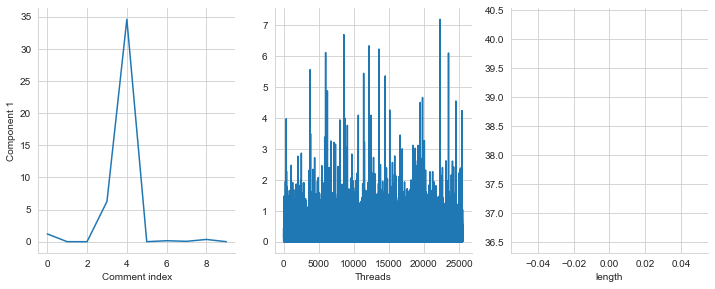

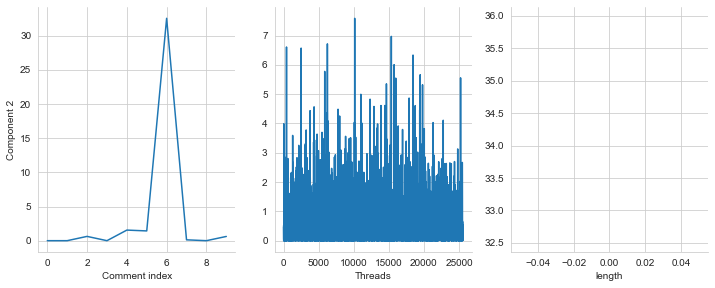

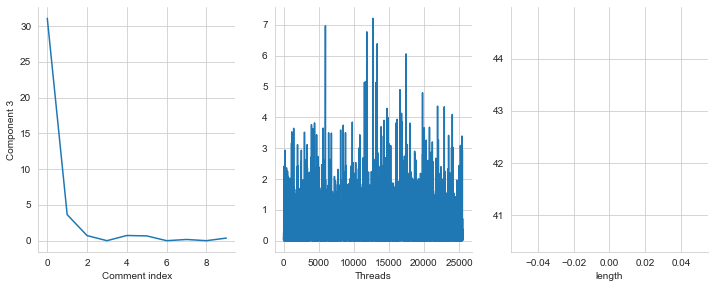

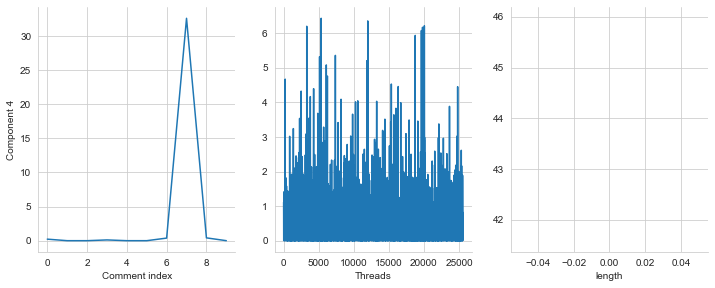

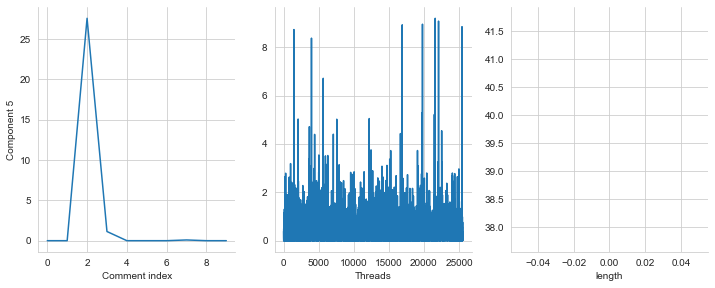

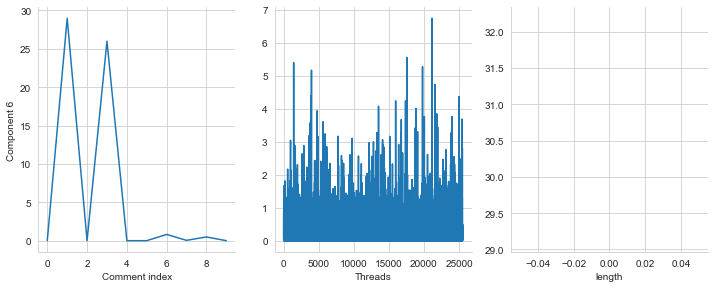

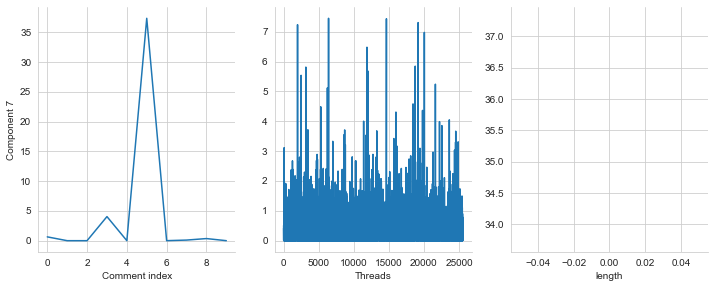

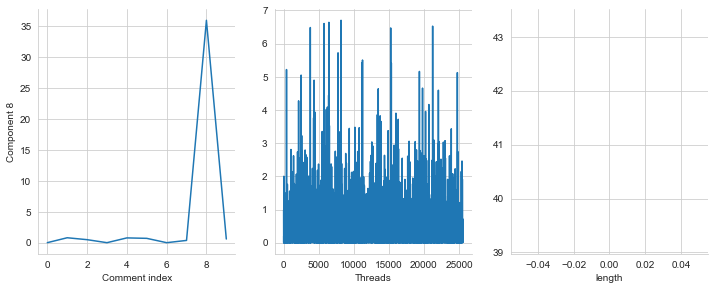

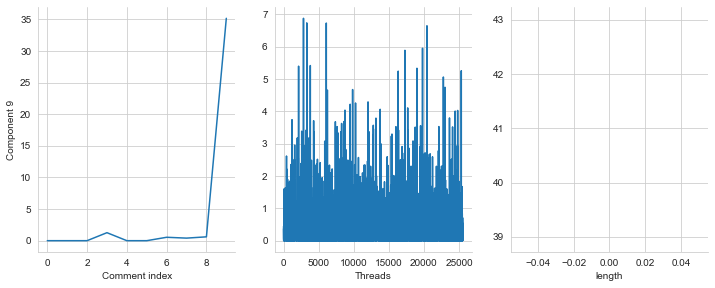

In [89]:
td_len.summarize(corpus, axis_names=['Comment index', 'Threads', 'length'], 
             output_dir='convokit/tensor_decomposer/reports/length-focused-TCA', 
             report_title='Length-focused-nonnegative', 
             liwc=True)

In [91]:
components = td_len.get_components(corpus)

In [101]:
td_len.get_component_example(components, 9)

,text,speaker
id,,
e4ophln,[[Chromatic Lantern]] at rare in multicolor blocks.,Haberdashery2000
e4os5mq,This guy commanders.,JibJig
e4p16w2,can't believe it's up to like $15. travesty!,willtodd
e4p1mse,Dude [[Thought Vessel]] and [[Goblin Bombardment]] are creeping their way to $10. What kind of world do we live in?,JibJig
e4p2jgp,"Thought vessel is extremely useful though. Get your four drop commander out on three and no maximum hand size. Colorless, so it can be used everywhere.",King_Of_The_Squirrel
e4pidv0,i personally see the no hand size as flavor text (no matter which card its on),VladimirHerzog
e4polf8,Found the Rakdos player.,domsucks
e4pp3kz,"How often do you actually have more than seven cards in Hand? And even if you do, how often do you find yourself actually needing/using this overflow of cards?",Chijima
e4pr1ih,"Well as an example, last night I was playing sultai lands with [[Tasigur]] as commander. The deck ramps like crazy and then fills up your hand with a combination of his ability, [[Gitrog]] triggers, and [[Tatyova]] triggers. It's not uncommon for me to be holding tons of cards with that deck, and when I'm ready to go off, I can usually sacrifice [[Reliquary Tower]] to [[Sylvan Safekeeper]] or [[Rain of Filth]] to kill no max handsize, discard to handsize at end step, and generate even more card draw off Gitrog because at that point half the cards I'm discarding are lands. \nAlso, if I have [[Burgeoning]], [[Exploration]], or [[Azusa]] I want to be holding lots of cards because I want to drop lands as often as possible and still have something else to do.",domsucks


### Using word count

In [102]:
for convo in corpus.iter_conversations():
    for idx, utt in enumerate(convo.get_chronological_utterance_list()):
        convo.meta['wc-{}'.format(idx+1)] = {'wc': utt.meta['liwc']['WC']}

In [103]:
td_wc = TensorDecomposer(feature_set=['wc-{}'.format(idx) for idx in range(1, 10+1)], 
                          obj_type="conversation", tensor_func='tensortools-ncp-bcd', rank=9)

In [104]:
td_wc.fit(corpus)

Constructing tensor...Done.
Decomposing tensor...NCP_BCD: iteration 1, objective 0.6122816967319878, improvement inf.
NCP_BCD: iteration 2, objective 0.5682458709241002, improvement 0.044035825807887674.
NCP_BCD: iteration 3, objective 0.5257075158996561, improvement 0.04253835502444403.
NCP_BCD: iteration 4, objective 0.4883726715613135, improvement 0.037334844338342665.
NCP_BCD: iteration 5, objective 0.4568590090527774, improvement 0.0315136625085361.
NCP_BCD: iteration 6, objective 0.42941203727979943, improvement 0.027446971772977946.
NCP_BCD: iteration 7, objective 0.40780736386553346, improvement 0.021604673414265974.
NCP_BCD: iteration 8, objective 0.39163681565911496, improvement 0.0161705482064185.
NCP_BCD: iteration 9, objective 0.37838817405009556, improvement 0.013248641609019396.
NCP_BCD: iteration 10, objective 0.3658573538839472, improvement 0.012530820166148371.
NCP_BCD: iteration 11, objective 0.3537460537473091, improvement 0.012111300136638081.
NCP_BCD: iteration 12

Report generated at convokit/tensor_decomposer/reports/wc-focused-TCA/report.html


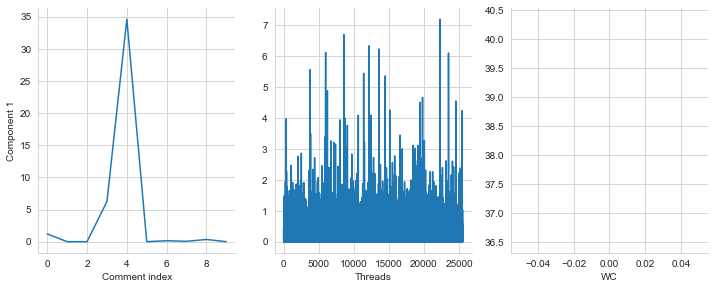

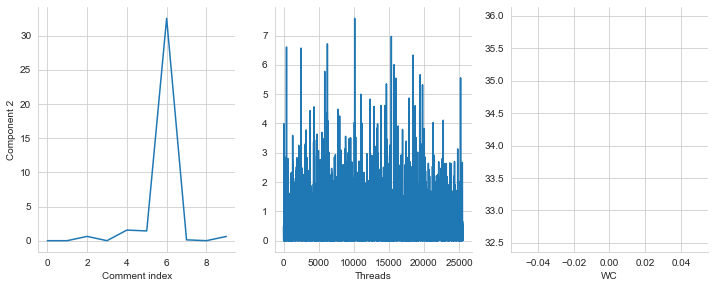

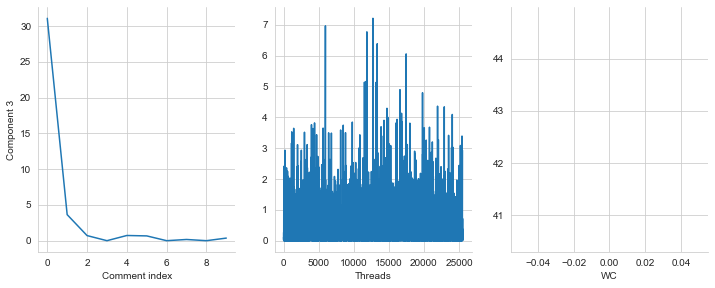

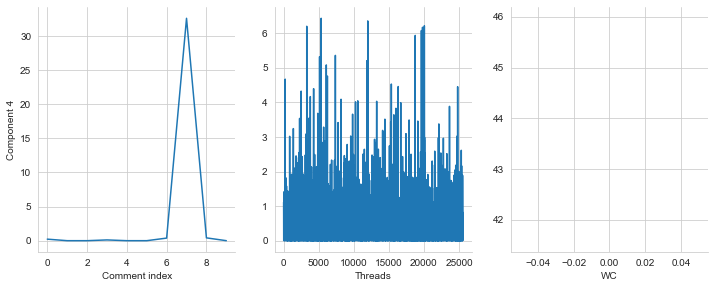

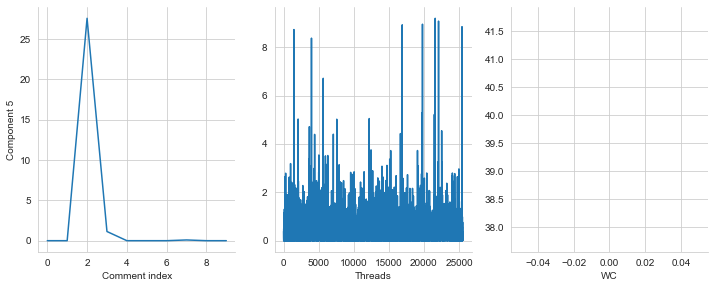

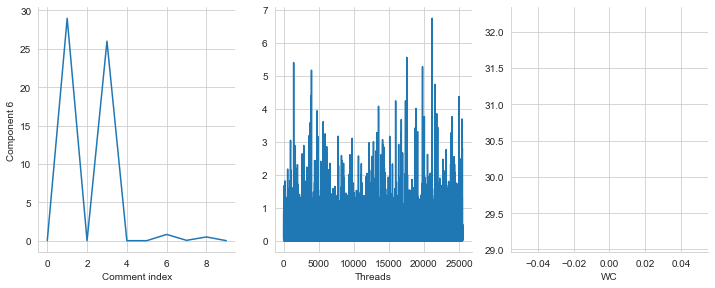

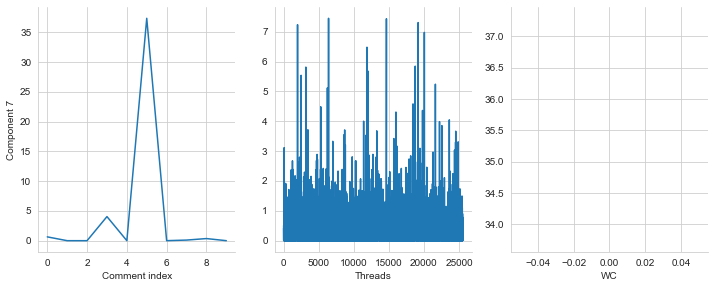

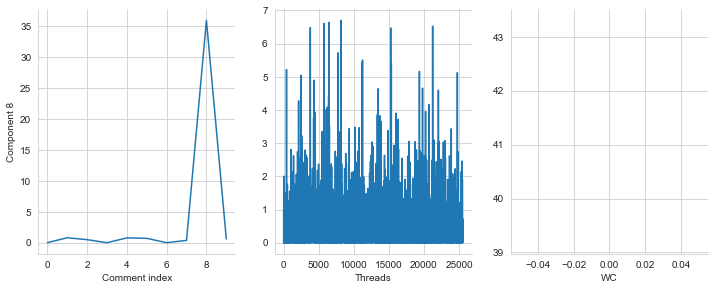

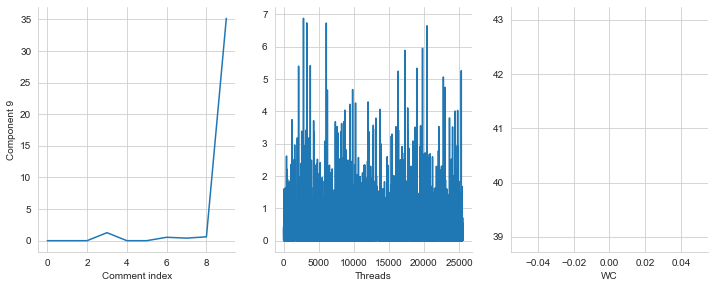

In [105]:
td_len.summarize(corpus, axis_names=['Comment index', 'Threads', 'WC'], 
             output_dir='convokit/tensor_decomposer/reports/wc-focused-TCA', 
             report_title='WC-focused-nonnegative', 
             liwc=True)